# NYC Yellow Taxi EDA: May 2022

**Objective:** Efficiently explore and analyze the NYC Yellow Taxi dataset (May 2022) to extract insights for predicting fare and trip duration, following best practices from "Exploratory Data Analysis with Python Cookbook" by Ayodele Oluleye.

---

## 1. Import Required Libraries

In [69]:
# Import libraries for EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load the Parquet Dataset

In [70]:
# Load the NYC Yellow Taxi Parquet dataset
parquet_path = '../data/yellow_tripdata_2022-05.parquet'
df = pd.read_parquet(parquet_path)
print(f"Loaded dataset with shape: {df.shape}")

Loaded dataset with shape: (3588295, 19)


## 3. Inspect Data Structure and Types

In [71]:
# Display the first few rows and basic info
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [72]:
# DataFrame shape and column types
print(f"DataFrame shape: {df.shape}")
df.info()

DataFrame shape: (3588295, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588295 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64    

In [73]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,3588295.0,1.713103,1.0,1.0,2.0,2.0,6.0,0.488809
tpep_pickup_datetime,3588295,2022-05-16 07:50:29.219312,2003-01-01 00:06:06,2022-05-08 18:14:16.500000,2022-05-16 09:14:42,2022-05-23 18:03:17,2022-06-01 23:55:30,NaN
tpep_dropoff_datetime,3588295,2022-05-16 08:08:42.275203,2003-01-01 00:31:38,2022-05-08 18:32:36,2022-05-16 09:33:15,2022-05-23 18:21:03.500000,2022-06-02 00:03:51,NaN
passenger_count,3458771.0,1.393923,0.0,1.0,1.0,1.0,9.0,0.955549
trip_distance,3588295.0,6.856861,0.0,1.15,1.96,3.73,357192.65,690.848782
RatecodeID,3458771.0,1.365674,1.0,1.0,1.0,1.0,99.0,5.239789
PULocationID,3588295.0,164.573797,1.0,132.0,162.0,234.0,265.0,65.628132
DOLocationID,3588295.0,162.551711,1.0,113.0,162.0,234.0,265.0,70.279259
payment_type,3588295.0,1.183209,0.0,1.0,1.0,1.0,4.0,0.507599
fare_amount,3588295.0,15.168132,-1311.5,7.0,10.5,17.0,6966.5,14.89484


## 4. Handle Missing Values

In [74]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

store_and_fwd_flag       129524
RatecodeID               129524
passenger_count          129524
airport_fee              129524
congestion_surcharge     129524
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
DOLocationID                  0
PULocationID                  0
trip_distance                 0
fare_amount                   0
payment_type                  0
extra                         0
mta_tax                       0
tolls_amount                  0
tip_amount                    0
total_amount                  0
improvement_surcharge         0
dtype: int64

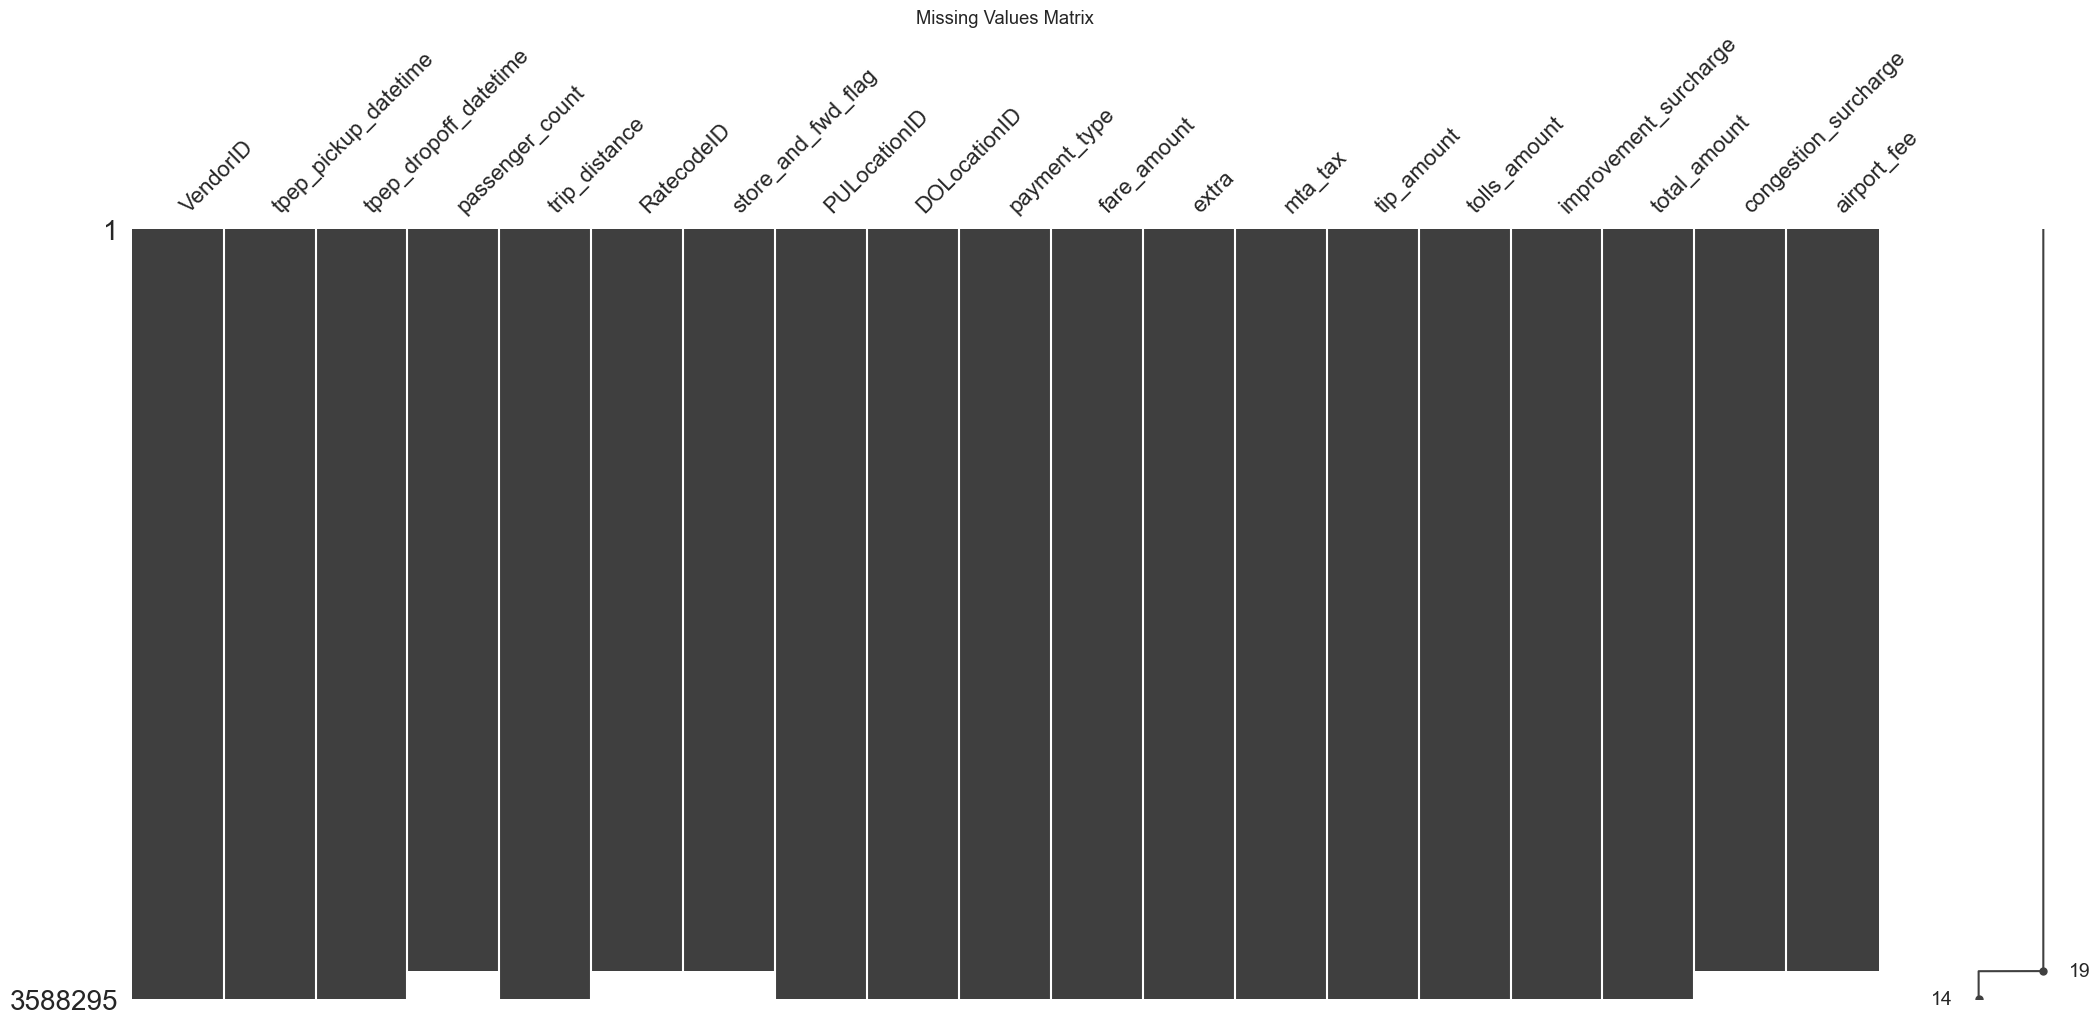

In [75]:
# Visualize missing values matrix
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

## 5. Univariate Analysis of Numerical Features

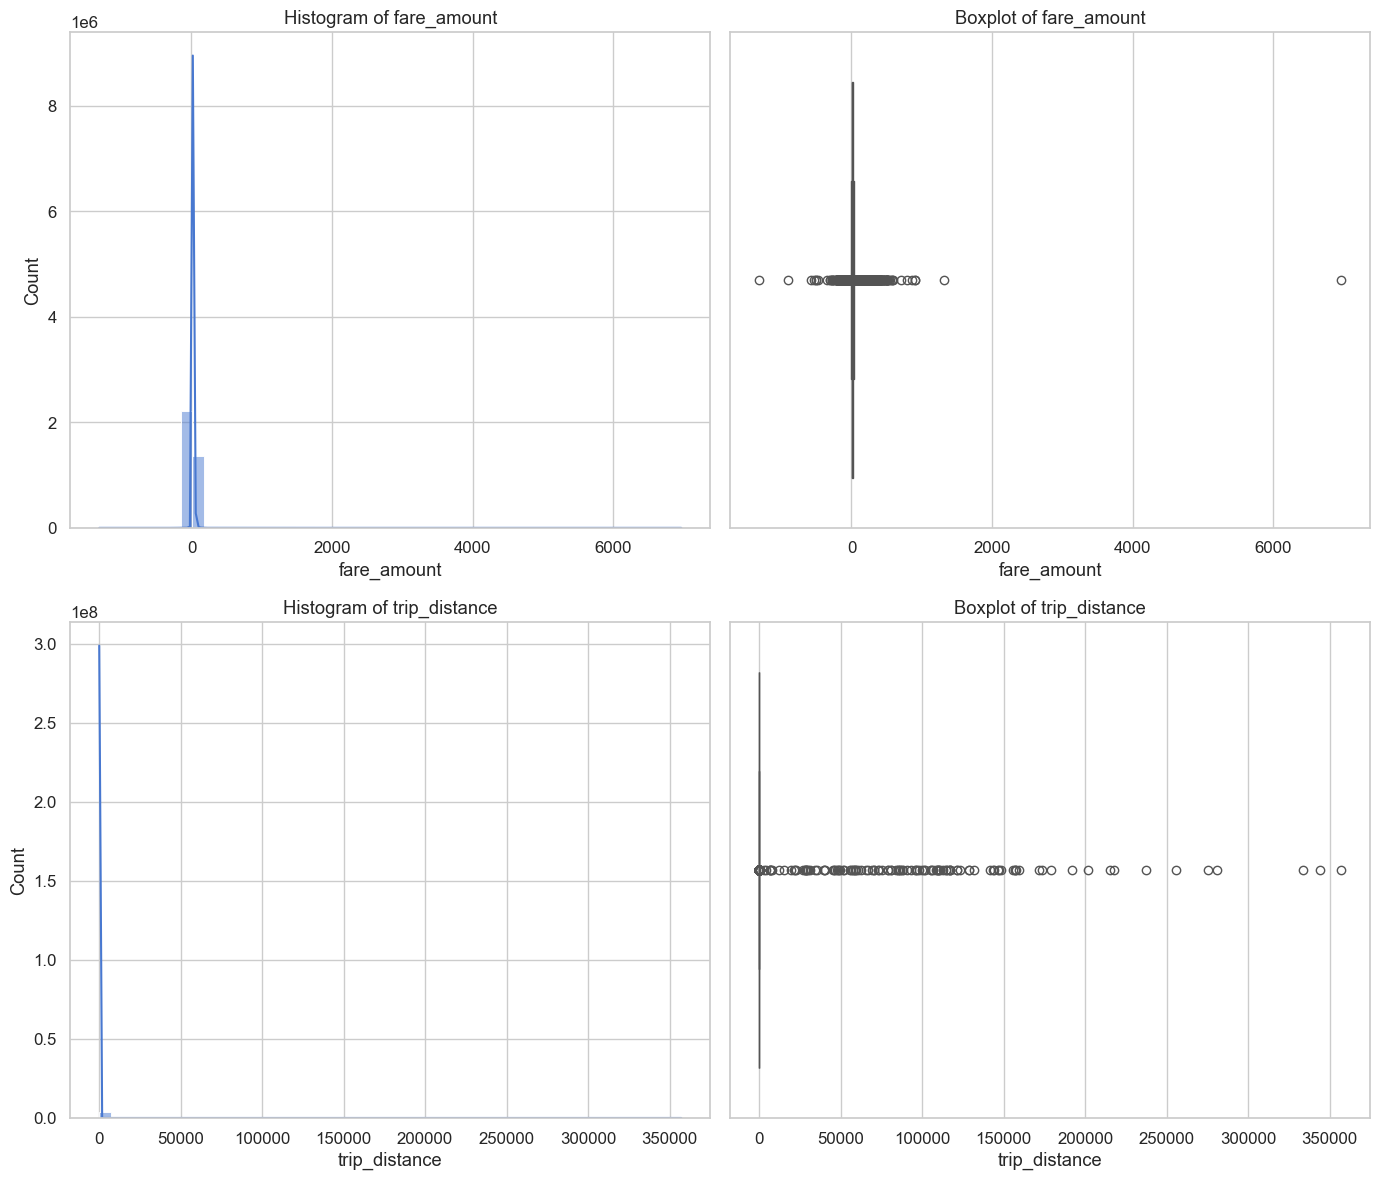

In [76]:
# Plot histograms and boxplots for key numerical features
num_cols = ['fare_amount', 'trip_distance']
fig, axes = plt.subplots(len(num_cols), 2, figsize=(14, 6 * len(num_cols)))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=50, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axes[i, 1], orient='h')
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## 6. Univariate Analysis of Categorical Features

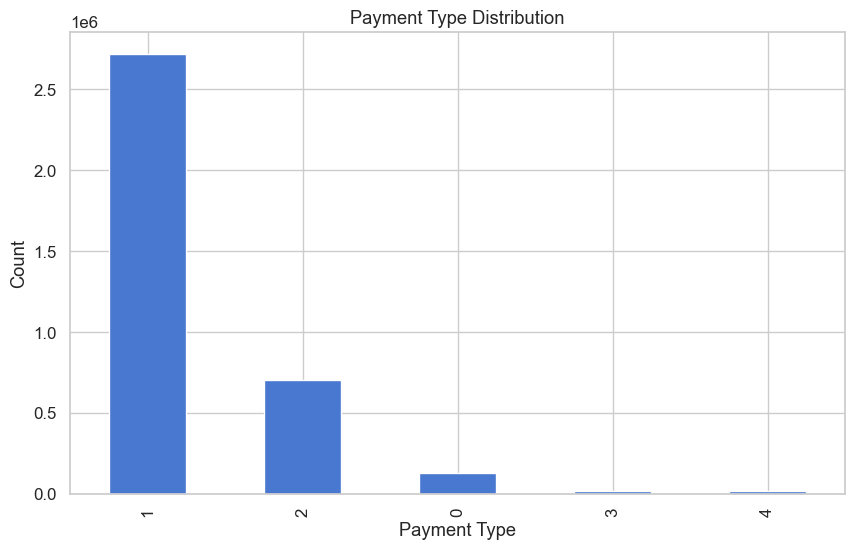

In [77]:
# Analyze categorical columns
df['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

if 'vendor_id' in df.columns:
    df['vendor_id'].value_counts().plot(kind='bar', color='orange')
    plt.title('Vendor ID Distribution')
    plt.xlabel('Vendor ID')
    plt.ylabel('Count')
    plt.show()

## 7. Bivariate Analysis: Correlation and Relationships

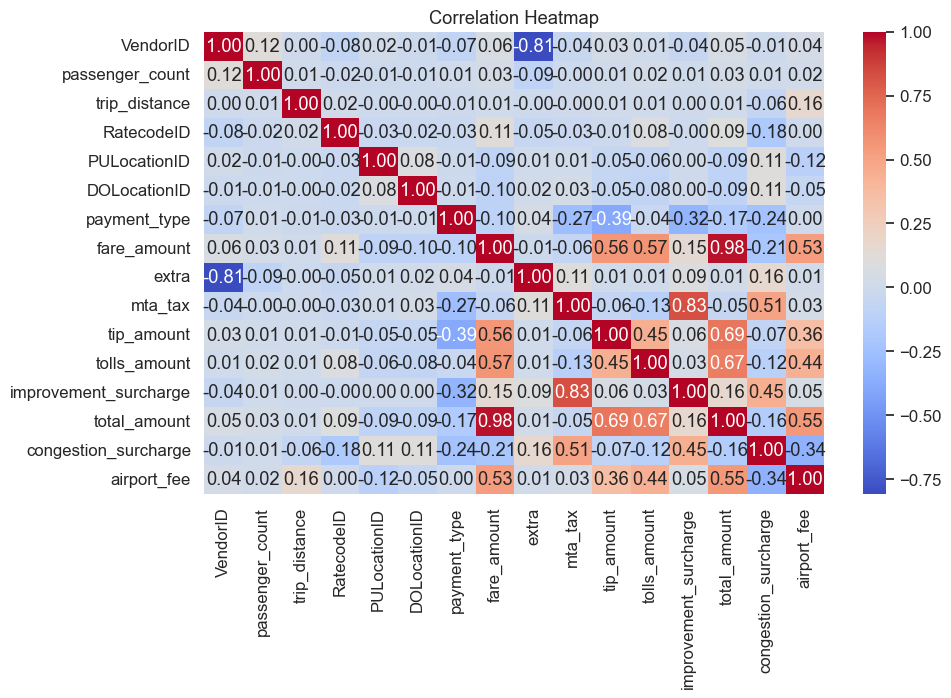

In [78]:
# Correlation heatmap for numerical features
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

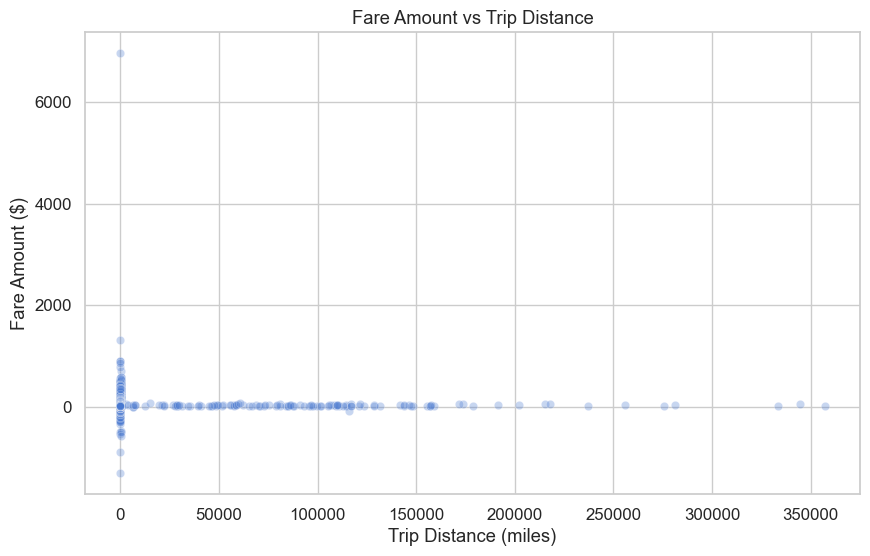

In [79]:
# Scatter plot: fare_amount vs trip_distance
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

## 8. Visualize Fare and Duration Distributions

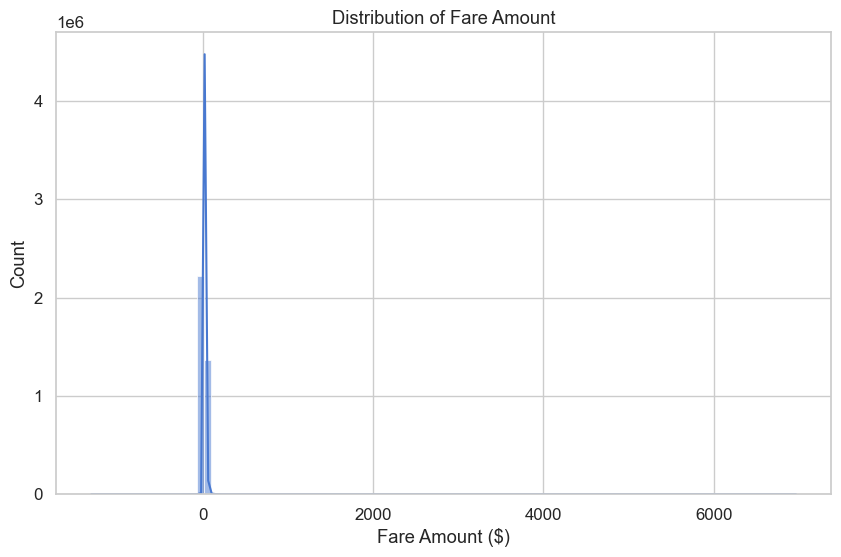

In [80]:
# Distribution of fare_amount
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.show()

# If trip duration exists, plot its distribution (will be created in feature engineering)
if 'trip_duration_min' in df.columns:
    sns.histplot(df['trip_duration_min'], bins=100, kde=True, color='green')
    plt.title('Distribution of Trip Duration (min)')
    plt.xlabel('Trip Duration (minutes)')
    plt.show()

## 9. Detect and Visualize Outliers

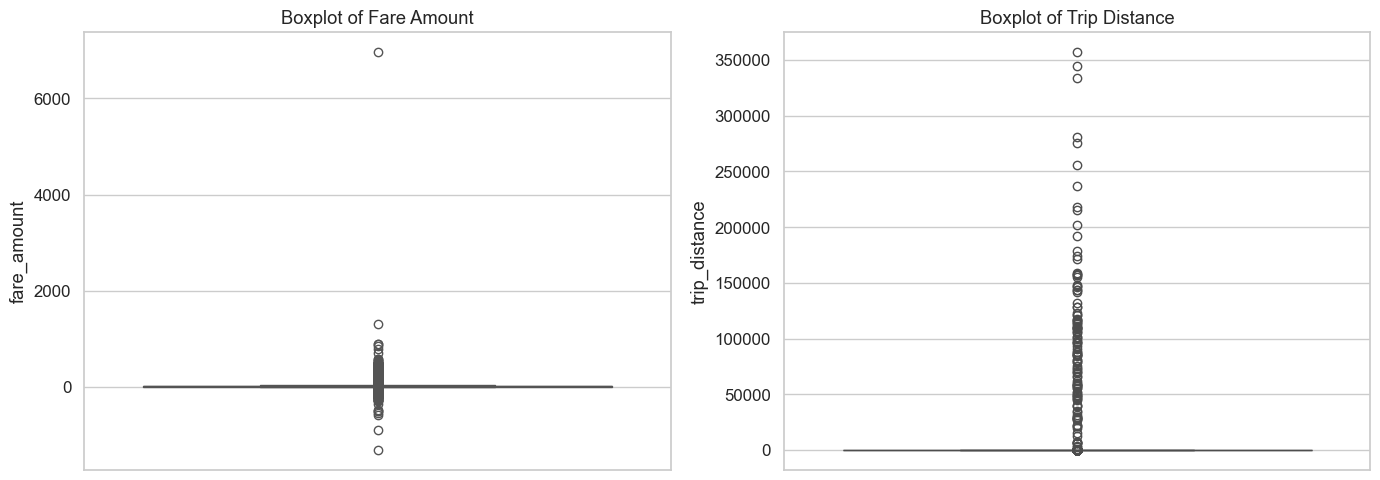

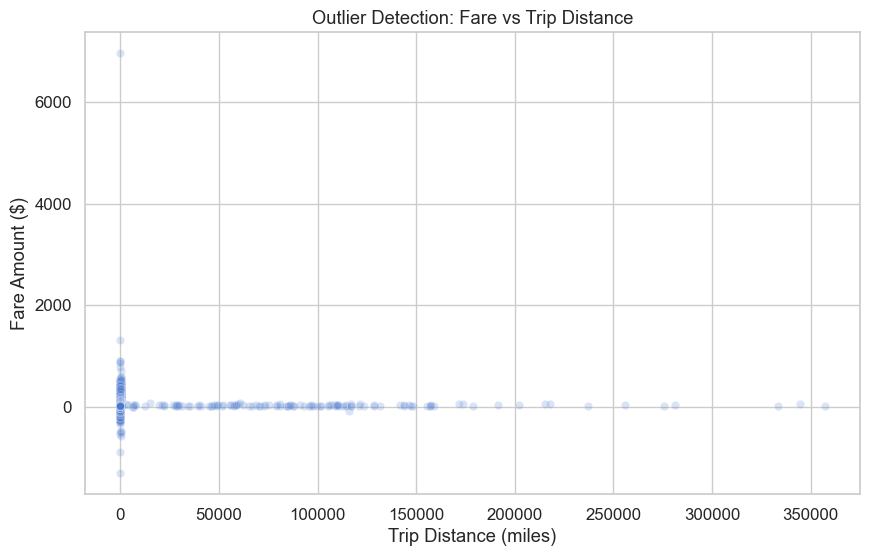

In [81]:
# Boxplots to detect outliers in fare_amount and trip_distance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y=df['fare_amount'], ax=axes[0])
axes[0].set_title('Boxplot of Fare Amount')
sns.boxplot(y=df['trip_distance'], ax=axes[1], color='orange')
axes[1].set_title('Boxplot of Trip Distance')
plt.tight_layout()
plt.show()

# Scatter plot to visualize outliers
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.2)
plt.title('Outlier Detection: Fare vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

## 10. Feature Engineering: Calculate Trip Duration

In [82]:
# Calculate trip duration in minutes
if 'tpep_pickup_datetime' in df.columns and 'tpep_dropoff_datetime' in df.columns:
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    print('Trip duration column added.')
    display(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_min']].head())

Trip duration column added.


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration_min
0,2022-05-01 00:00:36,2022-05-01 00:19:18,18.700000
1,2022-05-01 00:27:44,2022-05-01 00:41:33,13.816667
2,2022-05-01 00:59:00,2022-05-01 01:14:22,15.366667
3,2022-05-01 00:48:18,2022-05-01 01:28:02,39.733333
4,2022-05-01 00:28:26,2022-05-01 00:37:49,9.383333


## 11. Geospatial Analysis: Pickup and Dropoff Locations

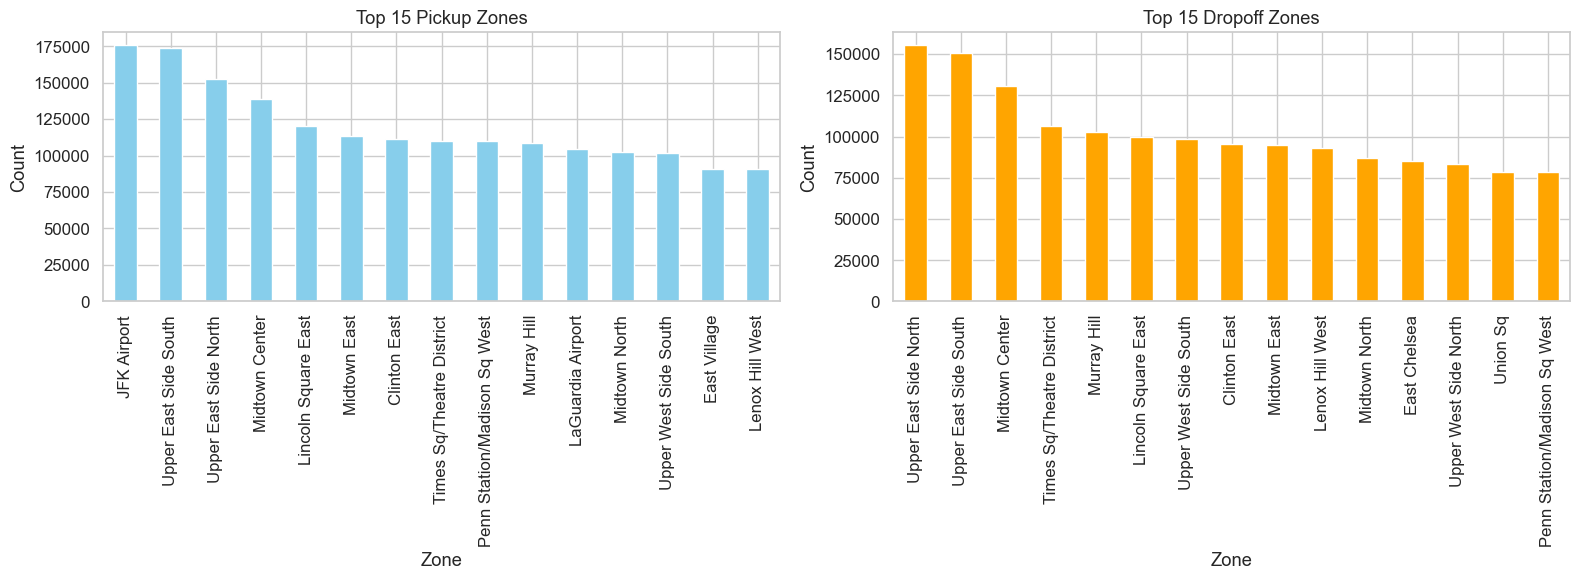

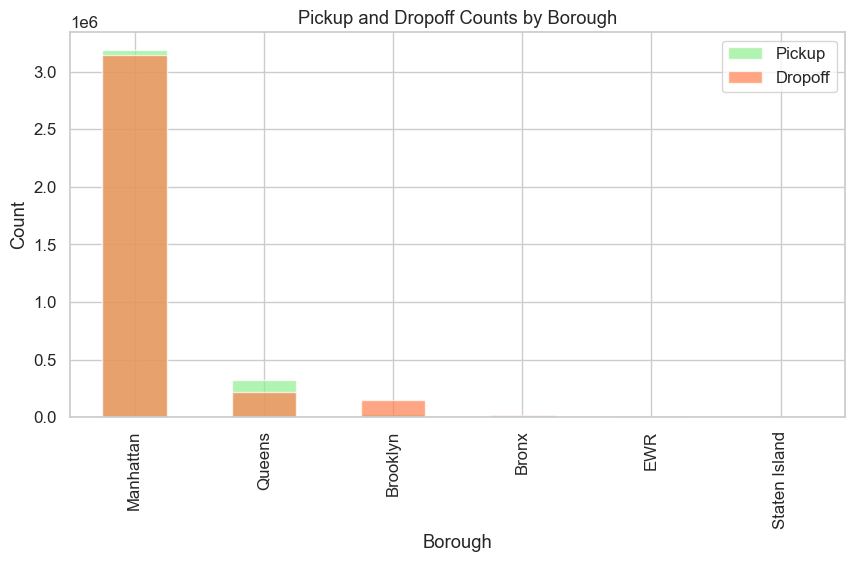

In [83]:

# Load taxi zones CSV
zones_path = '../data/NYC_Taxi_Zones_20251205.csv'
zones_df = pd.read_csv(zones_path)

# Create Location ID to Zone/Borough mapping
grouped_zones = zones_df[['Location ID', 'Zone', 'Borough']].copy()
grouped_zones['Location ID'] = grouped_zones['Location ID'].astype(str)
locid_to_zone = grouped_zones.set_index('Location ID')['Zone'].to_dict()
locid_to_borough = grouped_zones.set_index('Location ID')['Borough'].to_dict()

# Map pickup and dropoff Location IDs to zone/borough
pickup_col = 'PULocationID' if 'PULocationID' in df.columns else None
dropoff_col = 'DOLocationID' if 'DOLocationID' in df.columns else None

if pickup_col and dropoff_col:
    df['pickup_zone'] = df[pickup_col].astype(str).map(locid_to_zone)
    df['dropoff_zone'] = df[dropoff_col].astype(str).map(locid_to_zone)
    df['pickup_borough'] = df[pickup_col].astype(str).map(locid_to_borough)
    df['dropoff_borough'] = df[dropoff_col].astype(str).map(locid_to_borough)
    
    # Plot top 15 pickup and dropoff zones
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    df['pickup_zone'].value_counts().head(15).plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Top 15 Pickup Zones')
    axes[0].set_xlabel('Zone')
    axes[0].set_ylabel('Count')
    df['dropoff_zone'].value_counts().head(15).plot(kind='bar', ax=axes[1], color='orange')
    axes[1].set_title('Top 15 Dropoff Zones')
    axes[1].set_xlabel('Zone')
    axes[1].set_ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Plot pickup and dropoff counts by borough
    plt.figure(figsize=(10, 5))
    df['pickup_borough'].value_counts().plot(kind='bar', color='lightgreen', alpha=0.7, label='Pickup')
    df['dropoff_borough'].value_counts().plot(kind='bar', color='coral', alpha=0.7, label='Dropoff')
    plt.title('Pickup and Dropoff Counts by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print('PULocationID and DOLocationID columns not found in the dataset.')